# Machine Learning project

# Topic - Stroke Prediction using Machine Learning

### Introduction
### Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen and nutrients for its correct functioning. The other way around, the brain is not able to drain and expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is in a critical condition as brain cells will imminently begin to die.
### The American Stroke Association indicates that stroke is the fifth cause of death and disability in the United States. For this reason, stroke is considered a severe disease and has been the subject of extensive research, not only in the medical field but also in data science and machine learning studies.
 

### Dataset Description -
### The dataset used in this article contains 5110 records of patients. Each patient has 12 columns each referring to a concrete attribute. Most of these attributes correspond to medical records or the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average glucose levels in the blood, and body mass index (BMI). As we can observe from these first attributes, the dataset provides relevant data regarding the likelihood of patients suffering from stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact, stroke is also an attribute in the dataset and indicates in each medical record if the patient suffered from a stroke disease or not. 

### Data Dictionary -
####  a)Id - Unique Id
#### b)gender
#### c)age
#### d)hypertension - Binary Feature
#### e)Heart_disease - Binary Feature
#### f)Ever_married - Has the patient ever been married
#### g)Work_type - Work type of a patient
#### h)Residency_type - Residency type of patient
#### i)avg_glucose_level - Average Glucose level in the blood
#### j)bmi - Body mass Index
#### k)smoking_status - Smoking status of the patient
#### l)stroke - stroke event 

In [1]:
pip install imbalanced-learn

In [1]:
import numpy as np
import pandas as pd

### 1. Read the dataset and view the first 10 rows of it.

In [2]:
data=pd.read_csv("C:/Users/kanna/Downloads/SLR SLC Mini project/Project 1/healthcare-dataset-stroke-data.csv",encoding='latin1')
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### 2. Check the shape/dimension of the dataset

In [3]:
data.shape

(5110, 12)

### 3. Check for the missing values.Display number of missing values per column

In [4]:
missing_values = data.isna().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 4. Investigate and predict the missing BMI Value.

In [5]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

In [6]:
missing_values = data.isna().sum()
missing_values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 5. Check the datatype, number of non null values and name of each variable in the dataset. 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 6. Check the descriptive statistics of the dataset. 

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 7. Visualize the proportion of Stroke samples in the dataset.

In [9]:
import matplotlib.pyplot as plt


stroke_counts = data['stroke'].value_counts()
stroke_counts



0    4861
1     249
Name: stroke, dtype: int64

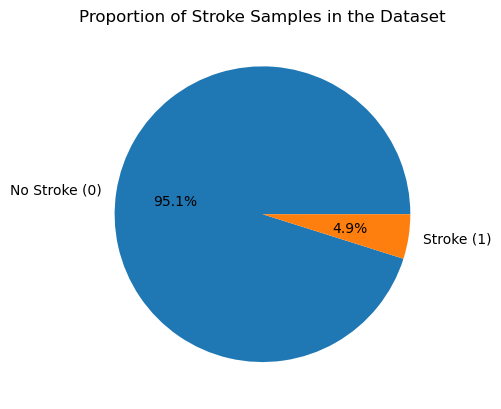

In [10]:
plt.pie(stroke_counts, labels=['No Stroke (0)', 'Stroke (1)'], autopct='%.1f%%')
plt.title('Proportion of Stroke Samples in the Dataset')
plt.show()

In [272]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

# select columns with skewed variables
skewed_cols = ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# perform power transformation on skewed columns
pt = PowerTransformer()
data[skewed_cols] = pt.fit_transform(data[skewed_cols])

# perform standard scaling on skewed columns
scaler = StandardScaler()
data[skewed_cols] = scaler.fit_transform(data[skewed_cols])


### 8. Visualize the Distribution of Male and Female Ages. Write the Observation. 

In [11]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
data = data[data['gender'] != 'Other']

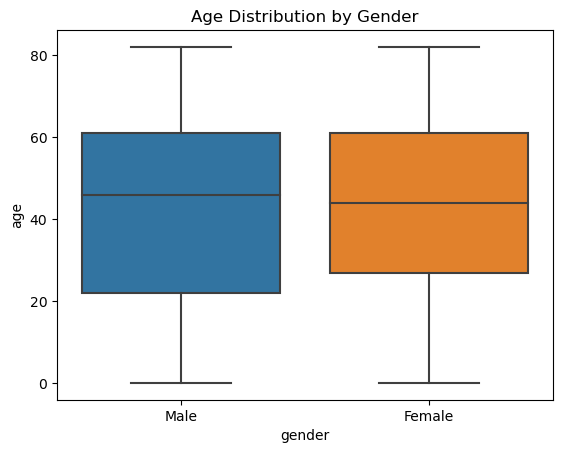

In [13]:
import seaborn as sns

# Create a boxplot to show the age distribution of males and females
sns.boxplot(x="gender", y="age", data=data)

# Add a title to the plot
plt.title("Age Distribution by Gender")

# Show the plot
plt.show()

### 10.Visualize the stroke sample based on
#### a) BMI and Glucose Level 

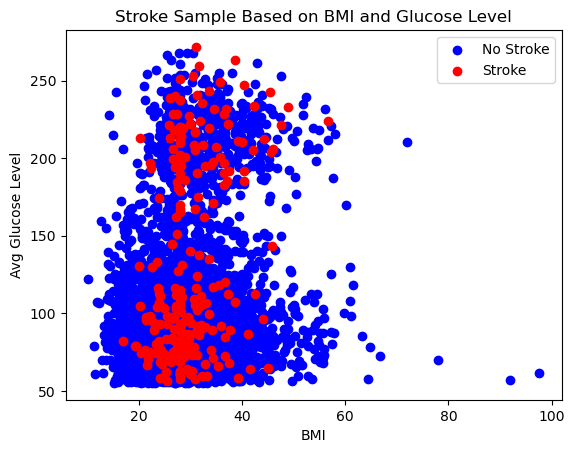

In [14]:
plt.scatter(data[data['stroke'] == 0]['bmi'], data[data['stroke'] == 0]['avg_glucose_level'], color='blue', label='No Stroke')
plt.scatter(data[data['stroke'] == 1]['bmi'], data[data['stroke'] == 1]['avg_glucose_level'], color='red', label='Stroke')

plt.xlabel('BMI')
plt.ylabel('Avg Glucose Level')
plt.title('Stroke Sample Based on BMI and Glucose Level')
plt.legend()
plt.show()

#### b) BMI and Age 

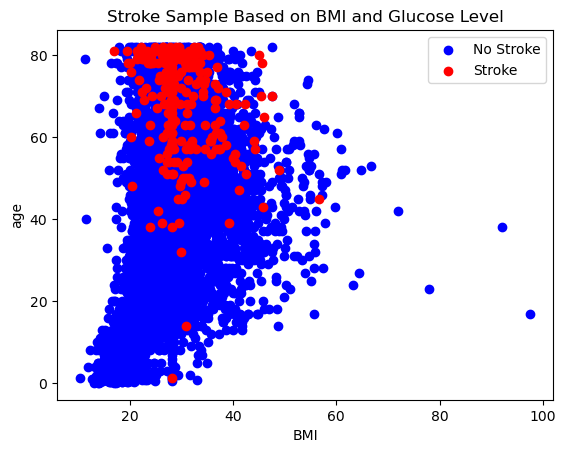

In [15]:
plt.scatter(data[data['stroke'] == 0]['bmi'], data[data['stroke'] == 0]['age'], color='blue', label='No Stroke')
plt.scatter(data[data['stroke'] == 1]['bmi'], data[data['stroke'] == 1]['age'], color='red', label='Stroke')

plt.xlabel('BMI')
plt.ylabel('age')
plt.title('Stroke Sample Based on BMI and Glucose Level')
plt.legend()
plt.show()

### 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.
 

In [16]:
data["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

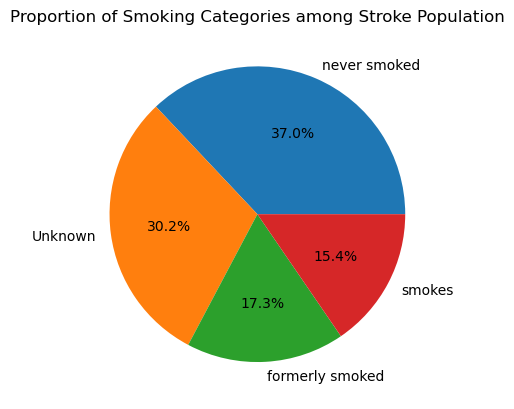

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


smoking_counts = data["smoking_status"].value_counts()

plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%')
plt.title("Proportion of Smoking Categories among Stroke Population")
plt.show()

### 12. Perform hypothesis testing to find the significant variables.

In [18]:
data_numerical=data.copy()

In [19]:
data_numerical = data.select_dtypes(include=np.number)
data_numerical

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67.0,0,1,228.69,36.6,1
1,51676,61.0,0,0,202.21,28.1,1
2,31112,80.0,0,1,105.92,32.5,1
3,60182,49.0,0,0,171.23,34.4,1
4,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.1,0
5106,44873,81.0,0,0,125.20,40.0,0
5107,19723,35.0,0,0,82.99,30.6,0
5108,37544,51.0,0,0,166.29,25.6,0


In [20]:
#numerical variables significance testing
import statsmodels.api as sm
X = data_numerical.iloc[:,:-1]

y = data_numerical.iloc[:,-1]    #stroke  (dependent variable)

X2 = sm.add_constant(X)


log_reg = sm.Logit(y, X2).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.155718
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5109
Model:                          Logit   Df Residuals:                     5102
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2005
Time:                        13:23:51   Log-Likelihood:                -795.56
converged:                       True   LL-Null:                       -995.14
Covariance Type:            nonrobust   LLR p-value:                 4.272e-83
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.5331      0.519    -14.516      0.000      -8.550      -6.516
id      

age, avg_glucose_level are significant variables

In [21]:
# Categorical variables significance testing

from scipy.stats import chi2_contingency

# create a list of columns to check
cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# create an empty list to store significant variables
significant_vars = []

# loop through each column and perform chi-square test
for col in cols:
    cross_tab = pd.crosstab(data['stroke'], data[col])
    chi, pval, dof, exp = chi2_contingency(cross_tab)
    if pval < 0.05:
        significant_vars.append(col)
    print(col, ': p-value =', pval)

print('\nSignificant variables:', significant_vars)

gender : p-value = 0.5598277580669416
hypertension : p-value = 1.688936253410575e-19
heart_disease : p-value = 2.120831133146208e-21
ever_married : p-value = 1.6862856191673454e-14
work_type : p-value = 5.40903546949726e-10
Residence_type : p-value = 0.29982523877153633
smoking_status : p-value = 2.0077041756108317e-06

Significant variables: ['hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status']


### 13. Drop the unnecessary columns. 

In [22]:
data = data.drop(['id'], axis=1)

In [23]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 14. Write the code to replace following categories columns in integer format as follow –
#### a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
 

#### b) ever_married('Yes': 1, 'No': 0) - c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1) 

#### c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)
 

In [24]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the categorical columns
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

In [25]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


### 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset. 

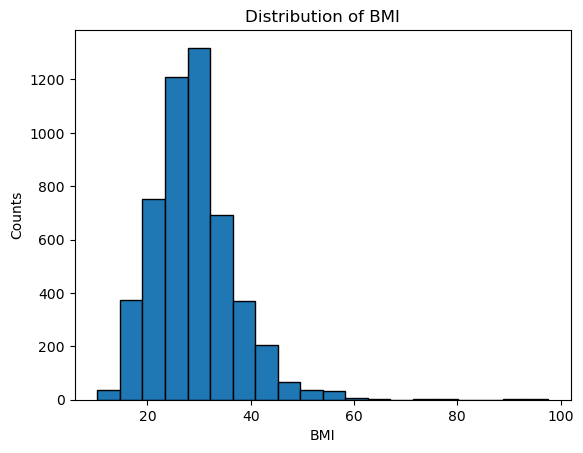

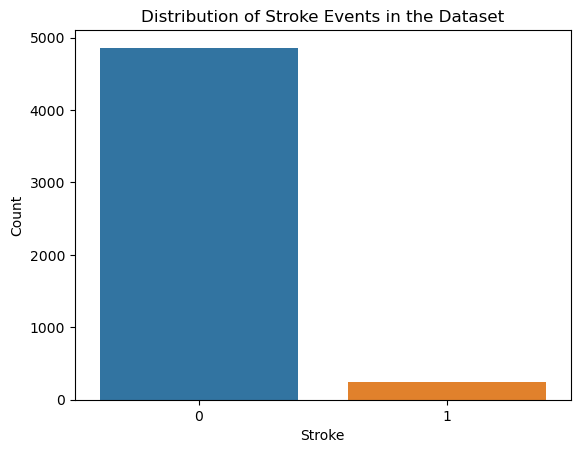

In [26]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'bmi' column
plt.hist(data['bmi'], bins=20, edgecolor='k')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.title('Distribution of BMI')
plt.show()


sns.countplot(data=data, x='stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.title('Distribution of Stroke Events in the Dataset')
plt.show()

### 16. List down columns that are highly skewed. 

In [27]:
data.skew()

gender               0.349410
age                 -0.137430
hypertension         2.715026
heart_disease        3.946786
ever_married        -0.658345
work_type           -0.308679
Residence_type      -0.032506
avg_glucose_level    1.572815
bmi                  1.087929
smoking_status      -0.039430
stroke               4.192807
dtype: float64

In [44]:
data.skew()

gender               0.349410
age                 -0.137430
hypertension         2.715026
heart_disease        3.946786
ever_married        -0.658345
work_type           -0.308679
Residence_type      -0.032506
avg_glucose_level    1.572815
bmi                  1.087929
smoking_status      -0.039430
stroke               4.192807
dtype: float64

In [28]:
right_skewed=data.skew()>0
right_skewed

gender                True
age                  False
hypertension          True
heart_disease         True
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level     True
bmi                   True
smoking_status       False
stroke                True
dtype: bool

In [29]:
left_skewed=data.skew()<0
left_skewed

gender               False
age                   True
hypertension         False
heart_disease        False
ever_married          True
work_type             True
Residence_type        True
avg_glucose_level    False
bmi                  False
smoking_status        True
stroke               False
dtype: bool

Right skewed: gender, hypertension, heart_disease, avg_glucose_level, bmi, stroke

Left skewed: age, ever_married, work_type

In [43]:
from sklearn.preprocessing import MinMaxScaler

# create MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform training set
X_train_scaled = scaler.fit_transform(X_train)

# transform test set
X_test_scaled = scaler.transform(X_test)

# reshape stroke variable in train and test sets
y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

# fit and transform training set for stroke variable
y_train_scaled = scaler.fit_transform(y_train_reshaped)

# transform test set for stroke variable
y_test_scaled = scaler.transform(y_test_reshaped)

### 17. List down the columns that are highly kurtosis. 

In [30]:
data.kurt()

gender               -1.878648
age                  -0.990931
hypertension          5.373470
heart_disease        13.582440
ever_married         -1.567196
work_type             0.143741
Residence_type       -1.999726
avg_glucose_level     1.681721
bmi                   3.635026
smoking_status       -1.318070
stroke               15.585730
dtype: float64

In [31]:
# Calculate the kurtosis for each column
kurtosis = data.kurtosis()

# Find the columns with a large absolute value of kurtosis
threshold = 3
highly_kurtotic_columns = kurtosis[abs(kurtosis) > threshold].index.tolist()

print(f"Columns with a large absolute value of kurtosis: {highly_kurtotic_columns}")


Columns with a large absolute value of kurtosis: ['hypertension', 'heart_disease', 'bmi', 'stroke']


### 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.
 

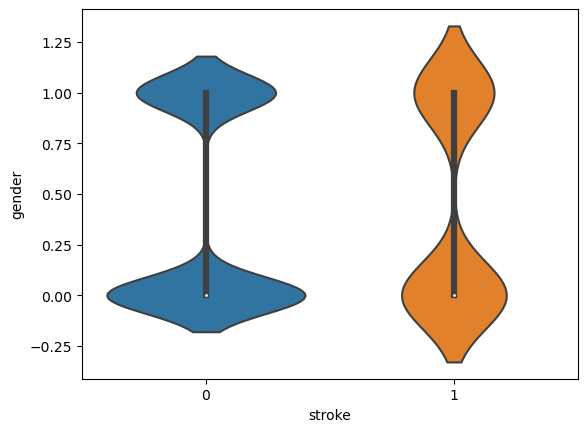

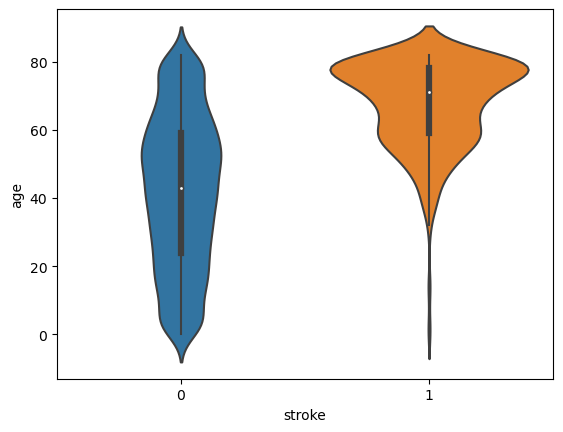

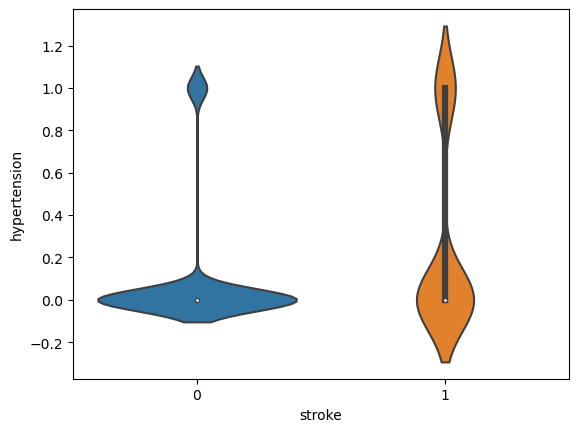

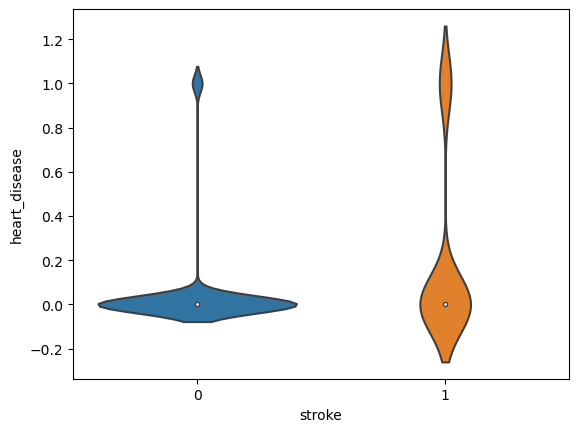

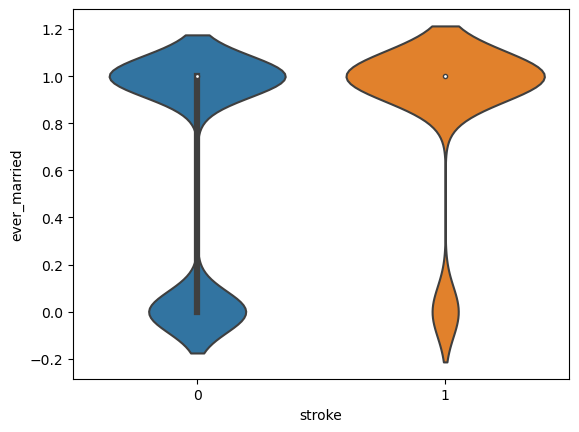

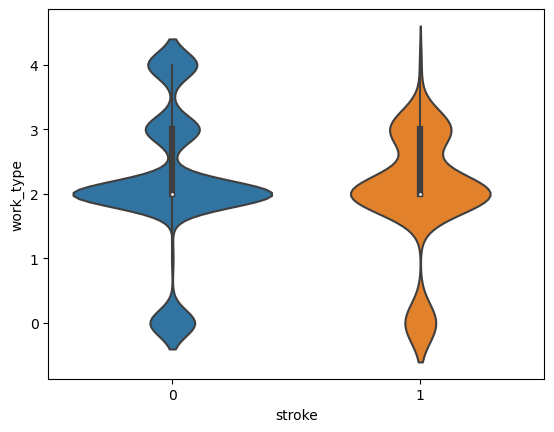

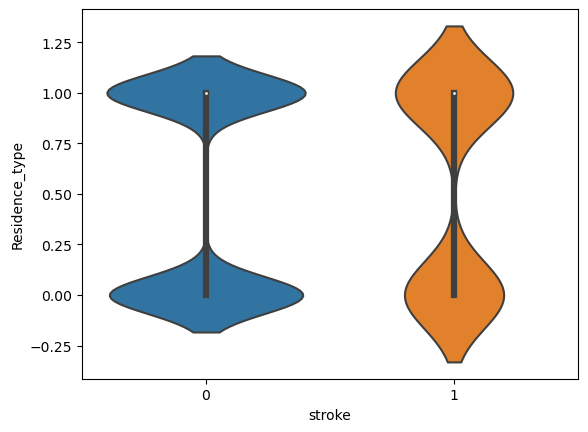

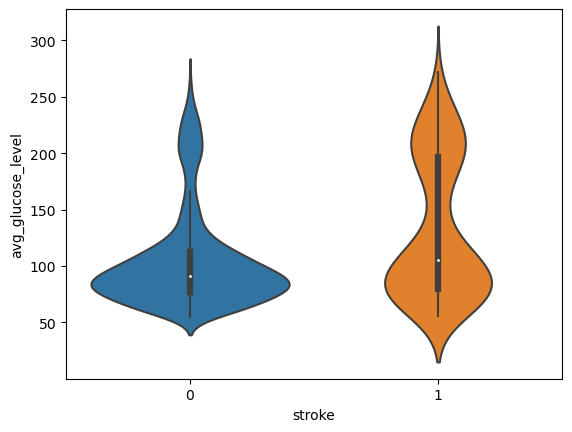

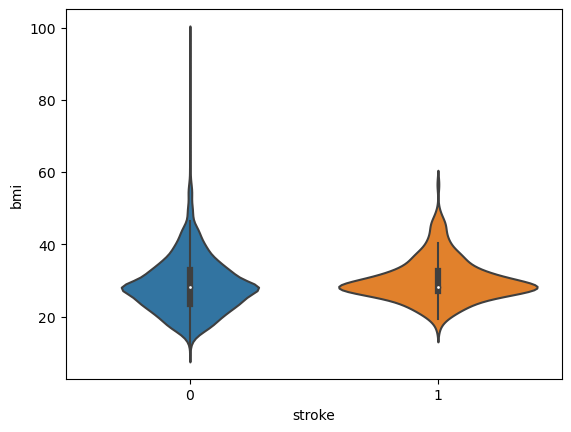

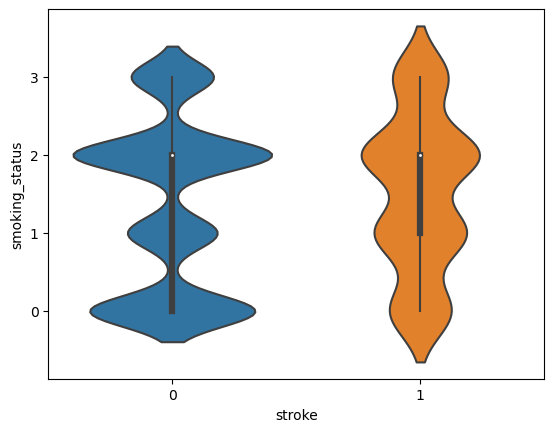

        gender                                                  age  \
         count      mean       std  min  25%  50%  75%  max   count   
stroke                                                                
0       4860.0  0.412963  0.492417  0.0  0.0  0.0  1.0  1.0  4860.0   
1        249.0  0.433735  0.496588  0.0  0.0  0.0  1.0  1.0   249.0   

                   ...   bmi       smoking_status                           \
             mean  ...   75%   max          count      mean       std  min   
stroke             ...                                                       
0       41.974831  ...  32.8  97.6         4860.0  1.370165  1.075564  0.0   
1       67.728193  ...  32.5  56.6          249.0  1.510040  0.984200  0.0   

                            
        25%  50%  75%  max  
stroke                      
0       0.0  2.0  2.0  3.0  
1       1.0  2.0  2.0  3.0  

[2 rows x 80 columns]


In [32]:
# Plot the distribution of each variable with respect to the outcome variable "stroke"
import matplotlib.pyplot as plt
import seaborn as sns

for column in data.columns:
    if column != "stroke":
        sns.violinplot(x="stroke", y=column, data=data)
        plt.show()

# Calculate summary statistics for each variable with respect to the outcome variable "stroke"
grouped = data.groupby("stroke")
summary = grouped.describe()
print(summary)


### 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation. Especially note down columns that are highly correlated (Positive or negative correlation, consider 0.7 to 1 as high)
 

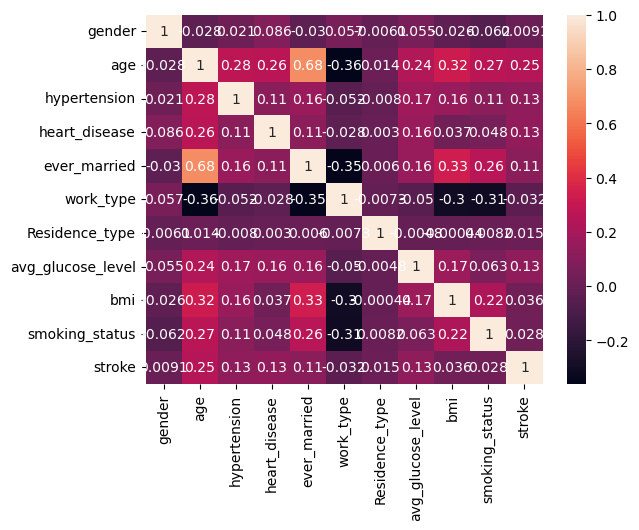

In [33]:
# Plot the heatmap for the correlation matrix
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [34]:
# Find columns with a high level of positive or negative correlation
threshold = 0.7
high_correlation = []
for i in range(len(correlation_matrix)):
    for j in range(i+1, len(correlation_matrix)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print(f"Columns with a high level of positive or negative correlation: {high_correlation}")


Columns with a high level of positive or negative correlation: []


There are no columns in our dataframe which are Highly Correlated

### 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio. 

In [35]:
from sklearn.model_selection import train_test_split

X = data.drop('stroke', axis=1)
y = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(3576, 10) (1533, 10) (3576,) (1533,)


### 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique. 

In [36]:
data.stroke.value_counts() #stroke is highly imbalanced

0    4860
1     249
Name: stroke, dtype: int64

In the given dataset, the number of observations in the positive (stroke=1) class is much smaller than the number of observations in the negative (stroke=0) class. Therefore, the dataset is imbalanced. In such a case, techniques like oversampling of the minority class or undersampling of the majority class can be used to balance the dataset.

For this particular dataset, as the number of observations in the positive class is significantly less than the negative class, oversampling technique like Synthetic Minority Over-sampling Technique (SMOTE) which can improve the model's performance.

In [37]:
# Import the imblearn library for oversampling
from imblearn.over_sampling import SMOTE

# Over-sample the minority class using SMOTE
X, y = SMOTE().fit_resample(data.drop('stroke', axis=1), data['stroke'])

# Print the class counts after oversampling
print(pd.Series(y).value_counts())


1    4860
0    4860
Name: stroke, dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6804, 10) (2916, 10) (6804,) (2916,)


### 22. Model Selection/hyperparameter tuning
#### - Try different models and fine tune their performance until you get the desired level of performance on the given dataset. 
### Model Evaluation 
#### - Evaluate the models using appropriate evaluation metrics. 

In [60]:
!pip install xgboost

     ---------------------------------------- 89.1/89.1 MB 2.7 MB/s eta 0:00:00


In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [40]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train_scaled)

# Define and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Define and train the XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Define and train the Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the models on test set and create a dataframe
results = {'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Decision Tree'],
           'Accuracy': [accuracy_score(y_test, lr_model.predict(X_test)),
                        accuracy_score(y_test, rf_model.predict(X_test)),
                        accuracy_score(y_test, xgb_model.predict(X_test)),
                        accuracy_score(y_test, dt_model.predict(X_test))],
           'Precision': [precision_score(y_test, lr_model.predict(X_test)),
                         precision_score(y_test, rf_model.predict(X_test)),
                         precision_score(y_test, xgb_model.predict(X_test)),
                         precision_score(y_test, dt_model.predict(X_test))],
           'Recall': [recall_score(y_test, lr_model.predict(X_test)),
                      recall_score(y_test, rf_model.predict(X_test)),
                      recall_score(y_test, xgb_model.predict(X_test)),
                      recall_score(y_test, dt_model.predict(X_test))],
           'F1 Score': [f1_score(y_test, lr_model.predict(X_test)),
                        f1_score(y_test, rf_model.predict(X_test)),
                        f1_score(y_test, xgb_model.predict(X_test)),
                        f1_score(y_test, dt_model.predict(X_test))]}
results_df = pd.DataFrame(results)

# Display the results dataframe
results_df

C:\Users\kanna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.815844,0.801177,0.840192,0.820221
1,Random Forest,0.944444,0.924084,0.968450,0.945747
2,XGBoost,0.955761,0.950508,0.961591,0.956018
3,Decision Tree,0.898491,0.885790,0.914952,0.900135


In [41]:
model_results = results_df.sort_values(by='Accuracy', ascending=False)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
2,XGBoost,0.955761,0.950508,0.961591,0.956018
1,Random Forest,0.944444,0.924084,0.968450,0.945747
3,Decision Tree,0.898491,0.885790,0.914952,0.900135
0,Logistic Regression,0.815844,0.801177,0.840192,0.820221


### Model Tuning

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best cross-validation score: 0.9469
Test set score: 0.9540
Confusion matrix:
[[1384   74]
 [  60 1398]]
ROC AUC: 0.9540


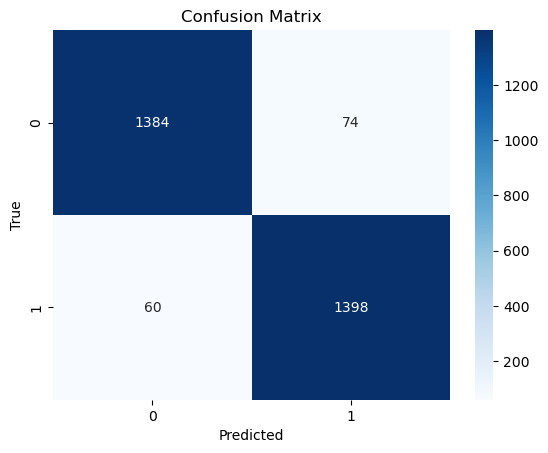

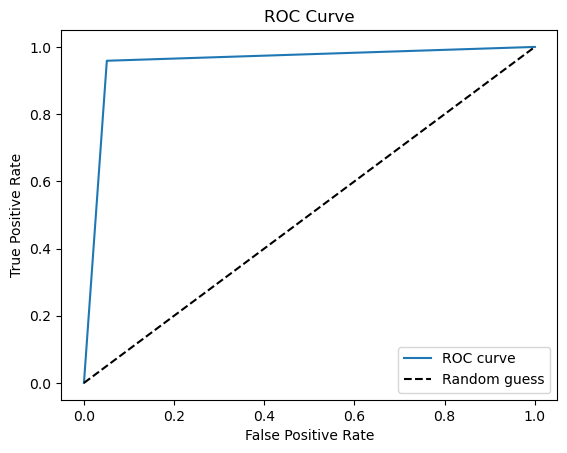

In [42]:
# Set up XGBoost classifier
xgb = XGBClassifier()

# Set up grid of hyperparameters to search over
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 150, 200]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get best hyperparameters and score on test set
best_params = grid_search.best_params_
best_score = grid_search.best_score_
y_pred = grid_search.predict(X_test)

# Compute confusion matrix and plot ROC curve
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Print results
print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Test set score: {grid_search.score(X_test, y_test):.4f}")
print(f"Confusion matrix:\n{cm}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot confusion matrix and ROC curve
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


According to the Confusion Matrix, we have 2785 correct predictions and 131 incorrect predictions.